In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

dataset = loadmat('data/face_emotion_data.mat')

X, y = dataset['X'], dataset['y']

n, features = np.shape(X)
p = 128 #num testing samples
lam = 0.5 #ridge regression parameter


In [5]:
sigmas = np.linspace(0.01, 50, num=50)
acc = []
predicted = np.zeros((n, features))
for sigma in sigmas:
  for col in range(features):
    X_feat = X[:, [col]]

    distsq=np.zeros((n, n),dtype=float)
    for i in range(0,n):
        for j in range(0,n):
          distsq[i,j]=(X_feat[i][0]-X_feat[j][0])**2

    K = np.exp(-distsq/(2*sigma**2))
    alpha = np.linalg.inv(K+lam*np.identity(n))@y

    x_test = np.linspace(np.min(X_feat), np.max(X_feat), p)
    distsq_xtest = np.zeros((p,n),dtype=float)
    for i in range(0,p):
        for j in range(0,n):
            distsq_xtest[i,j] = (X_feat[j][0]-x_test[i])**2

    dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha
    signTest = np.sign(np.exp(-distsq_xtest/(2*sigma**2))@alpha)

    fun = np.zeros((p,n),dtype=float)
    for i in range(0,p):
        for j in range(0,n):
            fun[i,j] = (X_feat[i][0]-X_feat[j][0])**2

    predData = np.exp(-fun/(2*sigma**2))@alpha
    predicted[:, col] = predData.flatten()
    """
    plt.plot(X_feat,y,'bo',label='Measured data')
    plt.plot(x_test,dtest,'r',label='Kernel fit')
    plt.plot(x_test,signTest,'orange',label='Sign fit')
    plt.plot(X_feat,predData,'go',label='Measured data (predicted)')
    plt.title(f'Data and Kernel Fit, Lambda = {lam}, Sigma = {sigma}')
    plt.legend(loc='lower right')
    plt.xlabel('x')
    plt.ylabel('d')"""
    #plt.show()

  final_pred = np.sign(np.sum(predicted, axis=1)).reshape((-1,1))
  #print("Accuracy")
  #print(sigma)
  #print(np.sum(final_pred == y) / n)
  acc.append(np.sum(final_pred == y) / n)

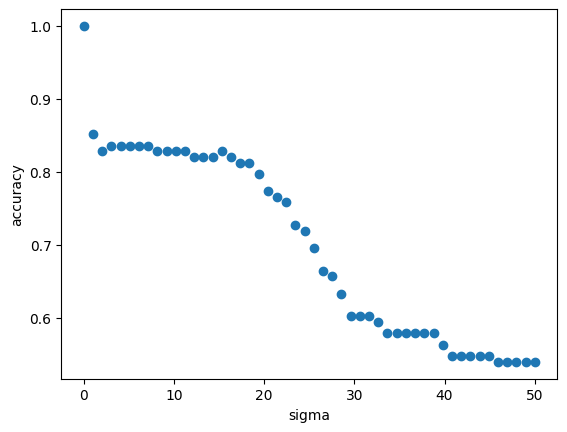

In [6]:
plt.plot(sigmas,acc,'o',label='Accuracy as a function of sigma')
plt.xlabel('sigma')
plt.ylabel('accuracy')
plt.show()
#this plot is just showing overfitting/the bias variance tradeoff
#We can achieve zero error by severely overfitting with sigma = 0.01

In [7]:
sigmas = np.linspace(0.01, 30, num=20)
acc = []
for sigma in sigmas:
  folds = 8
  sumAcc = 0
  for i in range(folds):
    bin_size = int(n/folds)
    X_test = X[bin_size*i:bin_size*(i+1)]
    X_train = np.vstack((X[0:bin_size*i], X[bin_size*(i+1):]))

    y_vertical = y.flatten()
    y_test = y_vertical[bin_size*i:bin_size*(i+1)]
    y_train = np.hstack((y_vertical[0:bin_size*i], y_vertical[bin_size*(i+1):]))
    p = bin_size
    n = np.shape(X_train)[0]
    predicted = np.zeros((bin_size, features))

    for col in range(features):
      X_feat = X_train[:, [col]]

      distsq=np.zeros((n, n),dtype=float)
      for i in range(0,n):
          for j in range(0,n):
            distsq[i,j]=(X_feat[i][0]-X_feat[j][0])**2

      K = np.exp(-distsq/(2*sigma**2))
      alpha = np.linalg.inv(K+lam*np.identity(n))@y_train

      x_test = np.linspace(np.min(X_feat), np.max(X_feat), p)
      distsq_xtest = np.zeros((p,n),dtype=float)
      for i in range(0,p):
          for j in range(0,n):
              distsq_xtest[i,j] = (X_feat[j][0]-x_test[i])**2

      dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha
      signTest = np.sign(np.exp(-distsq_xtest/(2*sigma**2))@alpha)

      fun = np.zeros((p,n),dtype=float)
      for i in range(0,p):
          for j in range(0,n):
              fun[i,j] = (X_test[i][0]-X_feat[j][0])**2

      predData = np.exp(-fun/(2*sigma**2))@alpha
      predicted[:, col] = predData.flatten()
    final_pred = np.sign(np.sum(predicted, axis=1)).reshape((-1,1))

    y_test = y_test.reshape((-1,1))
    sumAcc += np.sum(final_pred == y_test)/bin_size
  acc.append(sumAcc/(folds))

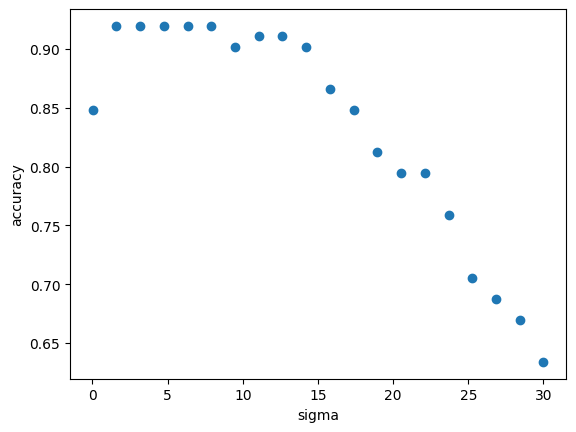

In [8]:
plt.plot(sigmas,acc,'o',label='Accuracy as a function of sigma')
plt.xlabel('sigma')
plt.ylabel('accuracy')
plt.show()
#Perfect accuracy is unachievable of course. The accuracy is 0.93 or so.